<a href="https://colab.research.google.com/github/Framos22/-MLA_FR/blob/main/FinalProject_Regression_FR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment #  
**Felix Ramos**  

## Standard Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook.

In [3]:
#example - you will replace this with the models you are actually using.
from sklearn.neighbors import KNeighborsClassifier

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

## Imports for Splitting Data and Building Pipeline


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [7]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [8]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

### Reading the Data

In [15]:
# Get the concrete data from the internet
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls"
data = pd.read_excel(url)

# Give the columns easy names
data.columns = ['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
                'CoarseAggregate', 'FineAggregate', 'Age', 'Strength']

# Show the size of our data and the first few rows
print("How many rows and columns:", data.shape)
print("First few rows:")
print(data.head())

How many rows and columns: (1030, 9)
First few rows:
   Cement  BlastFurnaceSlag  FlyAsh  Water  Superplasticizer  CoarseAggregate  \
0   540.0               0.0     0.0  162.0               2.5           1040.0   
1   540.0               0.0     0.0  162.0               2.5           1055.0   
2   332.5             142.5     0.0  228.0               0.0            932.0   
3   332.5             142.5     0.0  228.0               0.0            932.0   
4   198.6             132.4     0.0  192.0               0.0            978.4   

   FineAggregate  Age   Strength  
0          676.0   28  79.986111  
1          676.0   28  61.887366  
2          594.0  270  40.269535  
3          594.0  365  41.052780  
4          825.5  360  44.296075  


### Statistical and Visual Exploration




Basic Info About Our Data:
            Cement  BlastFurnaceSlag       FlyAsh        Water  \
count  1030.000000       1030.000000  1030.000000  1030.000000   
mean    281.165631         73.895485    54.187136   181.566359   
std     104.507142         86.279104    63.996469    21.355567   
min     102.000000          0.000000     0.000000   121.750000   
25%     192.375000          0.000000     0.000000   164.900000   
50%     272.900000         22.000000     0.000000   185.000000   
75%     350.000000        142.950000   118.270000   192.000000   
max     540.000000        359.400000   200.100000   247.000000   

       Superplasticizer  CoarseAggregate  FineAggregate          Age  \
count       1030.000000      1030.000000    1030.000000  1030.000000   
mean           6.203112       972.918592     773.578883    45.662136   
std            5.973492        77.753818      80.175427    63.169912   
min            0.000000       801.000000     594.000000     1.000000   
25%            0.0

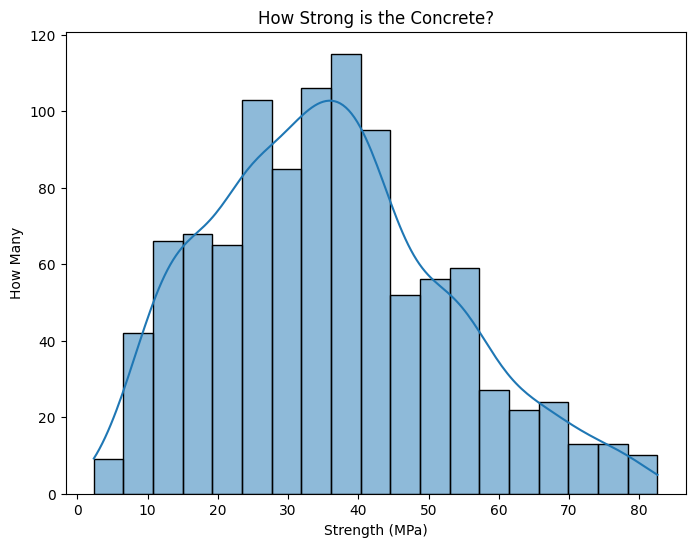

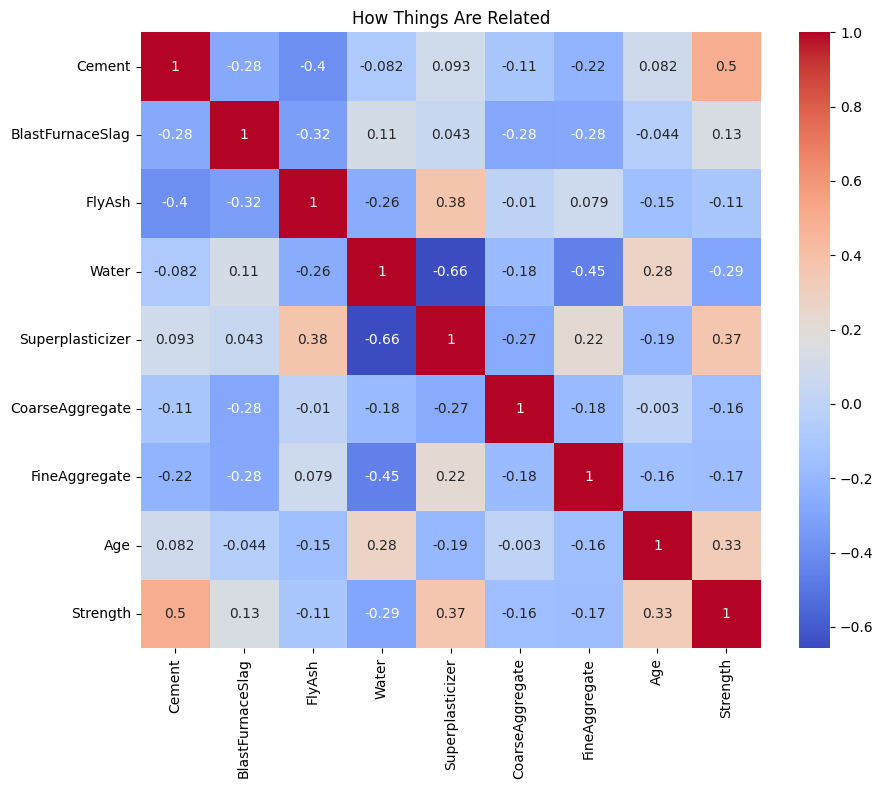

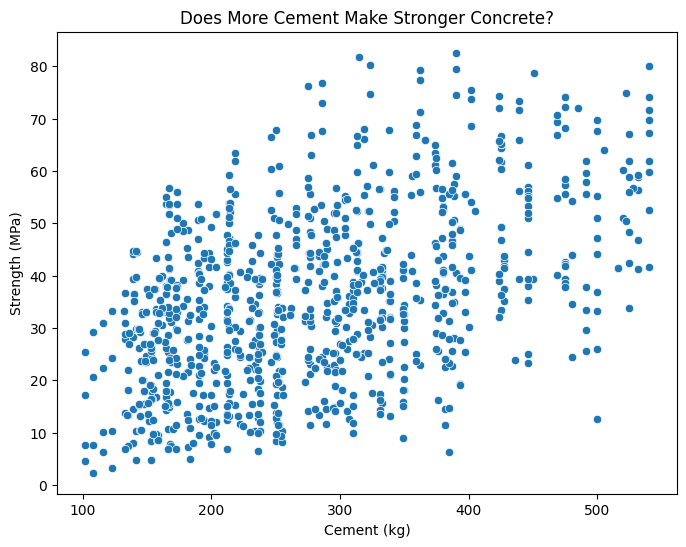

In [16]:
# Show basic numbers about the data (like averages)
print("Basic Info About Our Data:")
print(data.describe())

# Check if any data is missing
print("\nAny Missing Numbers?")
print(data.isnull().sum())

# Draw a picture of the concrete strength
plt.figure(figsize=(8, 6))
sns.histplot(data['Strength'], kde=True)  # Makes a graph showing how common each strength is
plt.title('How Strong is the Concrete?')
plt.xlabel('Strength (MPa)')
plt.ylabel('How Many')
plt.show()

# Draw a picture to see how things are related
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')  # Shows how ingredients affect strength
plt.title('How Things Are Related')
plt.show()

# Draw a dot picture of Cement vs Strength
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Cement', y='Strength', data=data)
plt.title('Does More Cement Make Stronger Concrete?')
plt.xlabel('Cement (kg)')
plt.ylabel('Strength (MPa)')
plt.show()

### Splitting Data into Train/Test

In [3]:
# Split into ingredients (X) and the strength we want to guess (y)
# Get the concrete data from the internet
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls"
import pandas as pd
data = pd.read_excel(url)

# Give the columns easy names
data.columns = ['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
                'CoarseAggregate', 'FineAggregate', 'Age', 'Strength']

# Show the size of our data and the first few rows
print("How many rows and columns:", data.shape)
print("First few rows:")
print(data.head())
X = data.drop('Strength', axis=1)  # All columns except Strength
y = data['Strength']  # Just the Strength column

# Split into practice (80%) and test (20%)
from sklearn.model_selection import train_test_split
X_practice, X_test, y_practice, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Practice data size:", X_practice.shape)
print("Test data size:", X_test.shape)

How many rows and columns: (1030, 9)
First few rows:
   Cement  BlastFurnaceSlag  FlyAsh  Water  Superplasticizer  CoarseAggregate  \
0   540.0               0.0     0.0  162.0               2.5           1040.0   
1   540.0               0.0     0.0  162.0               2.5           1055.0   
2   332.5             142.5     0.0  228.0               0.0            932.0   
3   332.5             142.5     0.0  228.0               0.0            932.0   
4   198.6             132.4     0.0  192.0               0.0            978.4   

   FineAggregate  Age   Strength  
0          676.0   28  79.986111  
1          676.0   28  61.887366  
2          594.0  270  40.269535  
3          594.0  365  41.052780  
4          825.5  360  44.296075  
Practice data size: (824, 8)
Test data size: (206, 8)


### Building the Pipeline

In [11]:
# List of our ingredients
from sklearn.compose import ColumnTransformer # Import ColumnTransformer
from sklearn.preprocessing import StandardScaler # Import StandardScaler here
from sklearn.pipeline import Pipeline # Import Pipeline here
from sklearn.linear_model import LinearRegression # Import LinearRegression here
#Import SVR here so it is available in this code block
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV # Import GridSearchCV here


ingredients = X.columns.tolist()

# Make numbers easier to work with (like making them smaller but keeping the pattern)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ingredients)
    ])

# Simple guessing tool (Linear Regression)
simple_guesser = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('guesser', LinearRegression())
])

# Fancier guessing tool (SVR) with a way to find the best settings
fancy_guesser = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('guesser', SVR())
])

# Try different settings for the fancy guesser
settings_to_try = {
    'guesser__C': [0.1, 1, 10],  # How much to trust the data
    'guesser__kernel': ['rbf', 'linear'],  # How to make guesses
    'guesser__epsilon': [0.1, 0.5]  # How much error is okay
}
best_fancy_guesser = GridSearchCV(fancy_guesser, settings_to_try, cv=5, scoring='neg_mean_squared_error')

### Executing the Model

In [12]:
# Teach the simple guesser
simple_guesser.fit(X_practice, y_practice)

# Teach the fancy guesser and find the best settings
best_fancy_guesser.fit(X_practice, y_practice)
print("Best settings for fancy guesser:", best_fancy_guesser.best_params_)

Best settings for fancy guesser: {'guesser__C': 10, 'guesser__epsilon': 0.1, 'guesser__kernel': 'rbf'}


### Evaluating Model

Simple Guesser Error (Practice): 10.519589880063482
Simple Guesser Error (Test): 9.796707832398445
Fancy Guesser Error (Practice): 6.281140059249645
Fancy Guesser Error (Test): 7.147245890130597


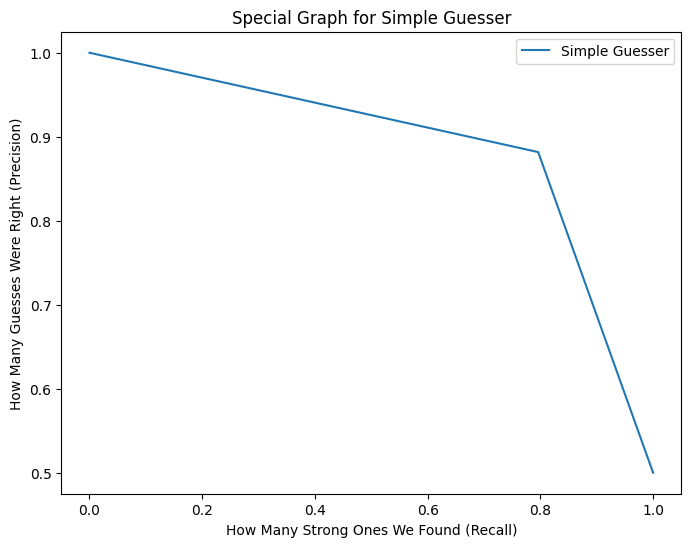

In [17]:
# Make guesses with both tools
import numpy as np # Import numpy
from sklearn.metrics import mean_squared_error # Import mean_squared_error
from sklearn.metrics import precision_recall_curve # Import precision_recall_curve here
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib as plt

practice_guesses_simple = simple_guesser.predict(X_practice)
test_guesses_simple = simple_guesser.predict(X_test)
practice_guesses_fancy = best_fancy_guesser.predict(X_practice)
test_guesses_fancy = best_fancy_guesser.predict(X_test)

# Check how far off our guesses are (lower is better)
error_practice_simple = np.sqrt(mean_squared_error(y_practice, practice_guesses_simple))
error_test_simple = np.sqrt(mean_squared_error(y_test, test_guesses_simple))
error_practice_fancy = np.sqrt(mean_squared_error(y_practice, practice_guesses_fancy))
error_test_fancy = np.sqrt(mean_squared_error(y_test, test_guesses_fancy))

print("Simple Guesser Error (Practice):", error_practice_simple)
print("Simple Guesser Error (Test):", error_test_simple)
print("Fancy Guesser Error (Practice):", error_practice_fancy)
print("Fancy Guesser Error (Test):", error_test_fancy)

# Turn strength into strong (1) or weak (0) to make a special graph
# If strength is above the middle value, call it strong (1)
middle_strength = y_test.median()
y_test_strong_or_weak = (y_test > middle_strength).astype(int)
guesses_strong_or_weak = (test_guesses_simple > middle_strength).astype(int)

# Draw the special graph
precision, recall, _ = precision_recall_curve(y_test_strong_or_weak, guesses_strong_or_weak)
plt.figure(figsize=(8, 6)) # Now plt is defined and can be used to create figures
plt.plot(recall, precision, label='Simple Guesser')
plt.xlabel('How Many Strong Ones We Found (Recall)')
plt.ylabel('How Many Guesses Were Right (Precision)')
plt.title('Special Graph for Simple Guesser')
plt.legend()
plt.show()